# Primera red neuronal

In [2]:
import tensorflow as tf
import pandas as pd 
from keras.models import  Sequential
from keras.layers import  Dense
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  0


In [3]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 12677356564906638395
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 1386046875
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 3412424562547390679
 physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1"
 xla_global_id: 416903419]

In [4]:
from tensorflow.python.client import device_lib
local_device_protos = device_lib.list_local_devices()
[x.name for x in local_device_protos]

['/device:CPU:0', '/device:GPU:0']

In [5]:
print(tf.test.gpu_device_name())


/device:GPU:0


In [6]:
tf.debugging.set_log_device_placement(True)

In [9]:
# with tf.device('/GPU:0'):
entradas = np.array([[0,0],[0,1],[1,0],[1,1]])
print(entradas.shape)


(4, 2)


In [1]:
salidas =  np.array([[0],[1],[1],[0]])
salidas.shape

NameError: name 'np' is not defined

In [11]:
#Define el tipo de modelo en este caso sera secuencial
model = Sequential()
#es la primera capa oculta que va tener dos entradas,16 neuronas en la capa oculta y su funcion de activacion sera tanh
model.add(Dense(16,input_dim= 2,activation='tanh'))
#esta seria la siguente capa en este caso seria nuestra capa de salida que solo tiene una neuorna y su funciona de activacion es la sigmoid
model.add(Dense(1,activation='sigmoid'))
#Cuando es la primero capa oculta posterio a la capa de entrada se le pone el numero de entradas como este ejemplo 
#claves sequential y Dense

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op StatelessRandomGetKeyCounter in device /job:localhost/replica:0/task:0/device:GPU:0
Executin

In [12]:
model.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['binary_accuracy'])
#En python a los algoritmos de propagacion se le conocen como optimizacion pero este tiene especifaciones mejoradas con tal no haya sobre ajuste
#En otra palabras los algoritmos de optimizacion de python estan basado en algoritmos de propagacion ver video clase 7

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0


In [13]:
#Este es el entrenamiento
# with tf.device('/GPU:0'):
XORTest = model.fit(entradas,
                    salidas,
                    epochs=1000
                    )

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0


In [8]:
#Evaluamos el modelo 
score = model.evaluate(entradas,salidas)
# print(model.metrics_names[1])
# print("\n$s: %.2f%%" % (model.metrics_names[1],score[1]*100))


1/1 [==============================] - 0s 149ms/step - loss: 0.0069 - binary_accuracy: 1.0000


In [9]:
print(model.predict(entradas).round())

[[0.]
 [1.]
 [1.]
 [0.]]


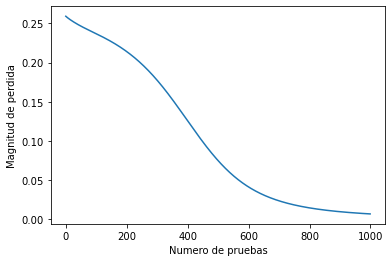

In [10]:
plt.xlabel("Numero de pruebas")
plt.ylabel("Magnitud de perdida")
plt.plot(XORTest.history["loss"])


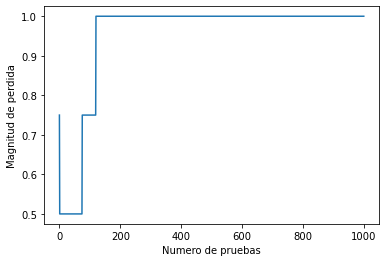

In [11]:
plt.xlabel("Numero de pruebas")
plt.ylabel("Magnitud de perdida")
plt.plot(XORTest.history["binary_accuracy"])

# Relu


In [12]:
model = Sequential()
model.add(Dense(16,input_dim= 2,activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['binary_accuracy'])

XORTest = model.fit(entradas,
                    salidas,
                    epochs=1000
                    )

Epoch 1/1000
1/1 [==============================] - 0s 365ms/step - loss: 0.8094 - binary_accuracy: 0.5000
Epoch 2/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.7955 - binary_accuracy: 0.5000
Epoch 3/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.7819 - binary_accuracy: 0.5000
Epoch 4/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.7685 - binary_accuracy: 0.5000
Epoch 5/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.7553 - binary_accuracy: 0.5000
Epoch 6/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.7424 - binary_accuracy: 0.5000
Epoch 7/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.7297 - binary_accuracy: 0.5000
Epoch 8/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.7173 - binary_accuracy: 0.5000
Epoch 9/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.7051 - binary_accuracy: 0.5000
Epoch 10/1000
1/1 [==============================] - 

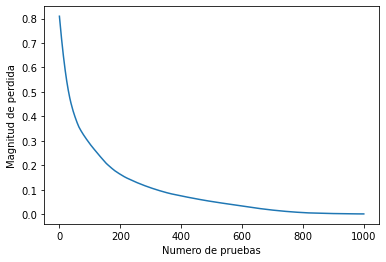

In [13]:
plt.xlabel("Numero de pruebas")
plt.ylabel("Magnitud de perdida")
plt.plot(XORTest.history["loss"])

# XOR de tres compuertas

In [19]:
entradas = np.array([
    [0,0,0],
    [0,0,1],
    [0,1,0],
    [0,1,1],
    [1,0,0],
    [1,0,1],
    [1,1,0],
    [1,1,1]
    ])
salidas =  np.array([[0],[1],[1],[0],[1],[0],[0],[1]])
#El Loss es el error cuardratico medio

In [20]:
model = Sequential()
model.add(Dense(3,input_dim= 3,activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['binary_accuracy'])

XORTest = model.fit(entradas,
                    salidas,
                    epochs=1000
                    )

Epoch 1/1000


ValueError: in user code:

    File "c:\Users\ALEXI\Anaconda3\lib\site-packages\keras\engine\training.py", line 878, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\ALEXI\Anaconda3\lib\site-packages\keras\engine\training.py", line 867, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\ALEXI\Anaconda3\lib\site-packages\keras\engine\training.py", line 860, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\ALEXI\Anaconda3\lib\site-packages\keras\engine\training.py", line 808, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\ALEXI\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\ALEXI\Anaconda3\lib\site-packages\keras\engine\input_spec.py", line 263, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_2" is incompatible with the layer: expected shape=(None, 2), found shape=(None, 3)


# NAND 

In [ ]:
entradas = np.array([
    [0,0,0],
    [0,0,1],
    [0,1,0],
    [0,1,1],
    [1,0,0],
    [1,0,1],
    [1,1,0],
    [1,1,1]
    ])
salidas =  np.array([[0,1],[1,1],[1,1],[0,1],[1,1],[0,1],[0,1],[1,0]])

In [ ]:
model = Sequential()
model.add(Dense(15,input_dim= 3,activation='relu'))
model.add(Dense(2))

model.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['binary_accuracy'])

NANDTest = model.fit(entradas,
                    salidas,
                    epochs=1000
                    )

In [ ]:
plt.xlabel("Numero de pruebas")
plt.ylabel("Magnitud de perdida")
plt.plot(NANDTest.history["loss"])